In [1]:
import os
import broad_qc as bq

# Constants
METRICS_DB = '/gale/netapp/seq11/illumina_runs/qc_metrics/broad_metrics.db'
METRICS_PATH = '/gale/netapp/seq11/illumina_runs/qc_metrics/'
FILE = 'LP-FGPHIP784088_Broad_QC__SALK003__22HGCNLT3.csv'

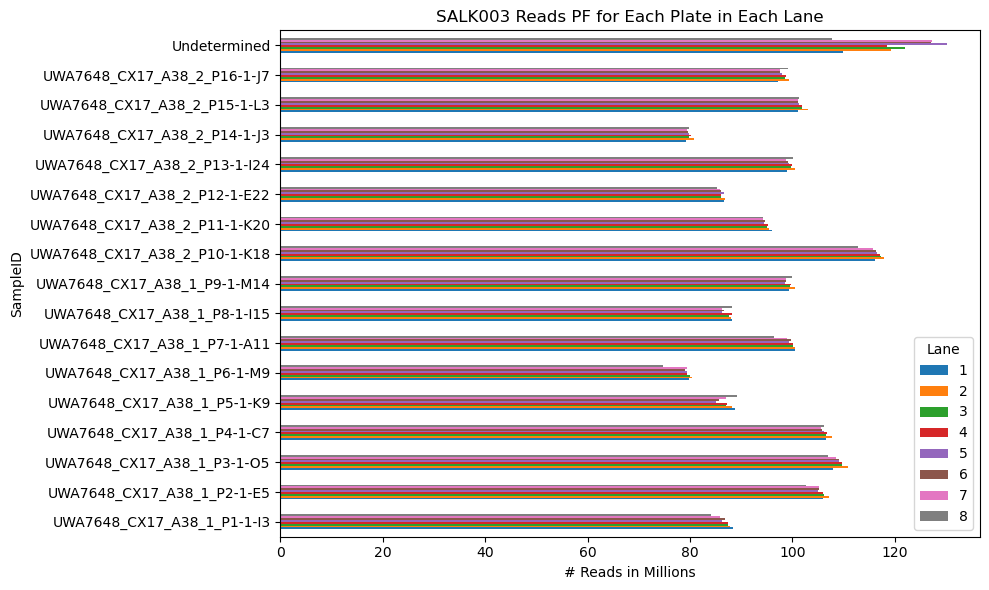

<Figure size 1000x600 with 0 Axes>

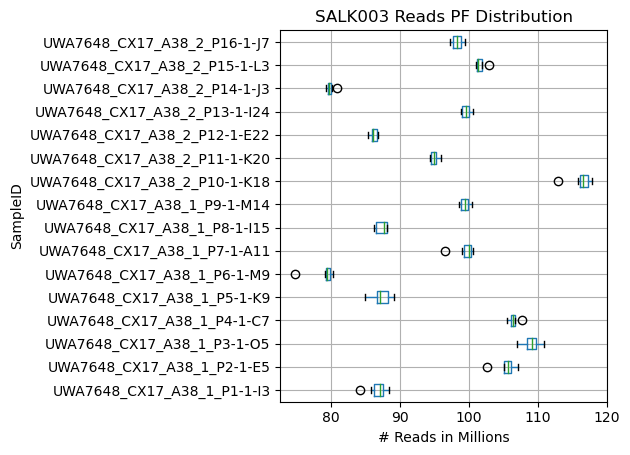

In [7]:
# Get pool strings and files from Broad report csv file
pool_string, pool_strings = bq.get_pool_strings(FILE)
pool_files = [os.path.join(METRICS_PATH, pool) for pool in pool_strings]

# Read dataframes
file_path = os.path.join(METRICS_PATH, FILE)
demux_stats, top_unknown_barcodes = bq.read_dataframes(file_path)

# Calculate and format metrics
metrics = bq.calculate_metrics(demux_stats, top_unknown_barcodes)

formatted_metrics = bq.format_metrics(metrics)

# Plot reads vs SampleID reversed
bq.plot_reads_vs_sampleID_reversed(demux_stats, METRICS_PATH, pool_string)

In [18]:
print(f"Percent PhiX Assumed: {percent_phix_assumed:.2%}")

Percent PhiX Assumed: 1.51%


In [3]:
# Extract samples from files
pools = bq.extract_samples_from_files(demux_stats, pool_files)

# Initialize list for all formatted metrics
formatted_metrics_list = []

for file_path, pool in pools.items():
    pool_metrics = bq.calculate_metrics(pool, top_unknown_barcodes)
    formatted_pool_metrics = bq.format_metrics(pool_metrics)
    formatted_metrics_list.append(formatted_pool_metrics)

# Write to database and print confirmation
bq.write_to_broad_metrics_db(pool_strings, formatted_metrics_list, METRICS_DB)

# Query the database
bq.query_database(METRICS_DB)

The database, /gale/netapp/seq11/illumina_runs/qc_metrics/broad_metrics.db, has been updated.
('SALK070', 16957585053, 'UWA7648_CB67_CBLA_1_P8-1-G10', 112594400)
('SALK071', 13686038866, 'UWA7648_CB61626364_CbDN_1_P1-1-J12', 83879246)
('SALK068', 16528383055, 'UWA7648_CB60_VeF_1_P3-1-F3', 101187285)
('SALK069', 13936901603, 'UWA7648_CB60_VePo_1_P8-1-I15', 82560752)
('SALK066', 7469962158, 'UWA7648_BS02_MGM3_1_P13-1-G10', 28210466)
('SALK067', 21608610701, 'UWA7648_CB60_VeA_1_P6-1-G5', 100508068)
('SALK062', 13083327162, 'UWA7648_CX2324_SubTH_1_P8-1-I15', 81255556)
('SALK063', 17455127706, 'UWA7648_BS030405_PnTg_1_P15-1-H6', 114361371)
('SALK003', 12296137707, 'UWA7648_CX17_A38_1_P6-1-M9', 74821871)


In [4]:
print("@card Broad sequencing QC metrics accepted")
for key, value in formatted_metrics.items():
    if key != "plate_with_fewest_reads_in_a_lane":
        print(f"{key}: {value}")
        
for pool, metrics in zip(pool_strings, formatted_metrics_list):
    print(f"{pool} plate_with_fewest_reads_in_a_lane: {metrics.get('plate_with_fewest_reads_in_a_lane')} Reads PF")
    
for pool, metrics in zip(pool_strings, formatted_metrics_list):
    print(f"{pool} total_reads: {metrics.get('total_reads')}")

@card Broad sequencing QC metrics accepted
run_yield: 3,949,188,605,047 bases
run_yield_excluding_undetermined: 3,697,159,186,380 bases
total_reads: 13,258,133,901 Reads PF
assumed_phiX_reads: 200,308,725 Reads PF
percent_phix_assumed: 1.51%
SALK003 plate_with_fewest_reads_in_a_lane: UWA7648_CX17_A38_1_P6-1-M9: 74,821,871 Reads PF
SALK003 total_reads: 12,296,137,707 Reads PF
